In [1]:
! pip install wget

In [2]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set()
from tensorflow import keras
from tensorflow.keras.layers import *
import wget
import scipy.io
from sklearn import preprocessing

# Task 1

In [3]:
# splitting traiand test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# reshaping the data so that keras can handle it
x_train = x_train.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)
x_train = x_train/255
x_test = x_test/255

x_train.shape, x_test.shape, x_train.min(), x_train.max()

((60000, 28, 28, 1), (10000, 28, 28, 1), 0.0, 1.0)

In [5]:
# one-hot encoding the labels
y_train_oh = keras.utils.to_categorical(y_train,10)
y_test_oh = keras.utils.to_categorical(y_test,10)

In [6]:
model1 = keras.models.Sequential()
model1.add(Conv2D(16, (3, 3), input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(16, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 32)        0

The number of parameters per layer can be seen in the summary table above.

In [9]:
history1 = model1.fit(x=x_train, y=y_train_oh, batch_size=32, epochs=5, validation_data=(x_test, y_test_oh))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1583 - accuracy: 0.9526 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0352 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0346 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0275 - val_accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9886


In [10]:
# predicting the x_test values
preds1 = model1.predict(x_test)

In [11]:
cce = keras.losses.CategoricalCrossentropy()
print('categorical cross-entropy loss:',cce(y_test_oh, preds1).numpy())

categorical cross-entropy loss: 0.036327135


In [12]:
print('accuracy:', accuracy_score(y_test, np.argmax(preds1, axis=1)))

accuracy: 0.9886


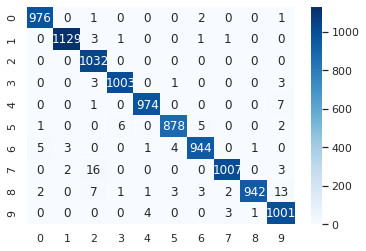

In [13]:
cm1 = confusion_matrix(y_test, np.argmax(preds1, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g')

The cnn confuses the numbers 9 and 4 less than our previous model. It is an improvement for sure, but the previous one already had a high accuracy so the improvement isn't greatly noticeable on this dataset, maybe using a more complex one we could see the real power of cnn's.

# Task 2

In [14]:
train = wget.download('http://ufldl.stanford.edu/housenumbers/train_32x32.mat')
test = wget.download('http://ufldl.stanford.edu/housenumbers/test_32x32.mat')

In [15]:
# unpacking the images
train = scipy.io.loadmat(train)
test = scipy.io.loadmat(test)

In [16]:
# using the default train test split
train_X = train.get('X')
train_y = train.get('y')
test_X = test.get('X')
test_y = test.get('y')

In [17]:
train_X.shape, test_X.shape, train_X.min(), train_X.max()

((32, 32, 3, 73257), (32, 32, 3, 26032), 0, 255)

We have 73257 train and 26032 test examples.

In [18]:
print(f'We have {len(set(train_y.flat))} classes:', set(train_y.flat))

We have 10 classes: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [19]:
print('The dimension of the images is:', train_X.shape[:3])

The dimension of the images is: (32, 32, 3)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


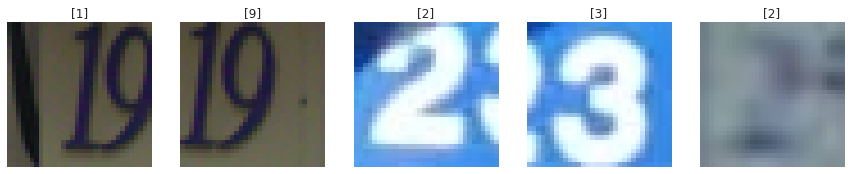

In [20]:
fig = plt.figure(1, (15., 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.4)

for i in range(5):
    grid[i].imshow(train_X[:,:,:,i])
    grid[i].set_title(train_y[i])
    grid[i].axis('off')

It seems like each image has a label for each digit it contains

In [21]:
# transforming the labels because keras didn't like it when it started with 1 and not 0
le = preprocessing.LabelEncoder()
le.fit(train_y)
le.fit(test_y)
train_y = le.transform(train_y)
test_y = le.transform(test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# reshaping the data
train_X = train_X.transpose((3, 0, 1, 2))
test_X = test_X.transpose((3, 0, 1, 2))

train_X = train_X / 255
test_X = test_X  / 255

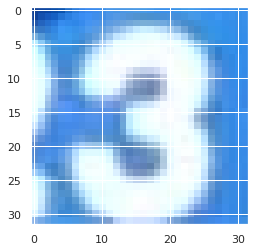

In [23]:
plt.imshow(train_X[3])

In [24]:
train_X.shape, test_X.shape, train_X.min(), train_X.max()

((73257, 32, 32, 3), (26032, 32, 32, 3), 0.0, 1.0)

In [25]:
# one-hot encoding the labels
train_y_oh = keras.utils.to_categorical(train_y, 10)
test_y_oh = keras.utils.to_categorical(test_y, 10)

In [26]:
model2 = keras.models.Sequential()
model2.add(Conv2D(16, (3, 3), input_shape=train_X.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(16, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 12, 12, 32)       

In [29]:
history2 = model2.fit(x=train_X, y=train_y_oh, batch_size=32, epochs=15, validation_data=(test_X, test_y_oh))

Epoch 1/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.8779 - accuracy: 0.7206 - val_loss: 0.5959 - val_accuracy: 0.8313
Epoch 2/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4683 - accuracy: 0.8640 - val_loss: 0.5259 - val_accuracy: 0.8471
Epoch 3/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4173 - accuracy: 0.8780 - val_loss: 0.4666 - val_accuracy: 0.8638
Epoch 4/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.3844 - accuracy: 0.8878 - val_loss: 0.4609 - val_accuracy: 0.8687
Epoch 5/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.3619 - accuracy: 0.8939 - val_loss: 0.4220 - val_accuracy: 0.8771
Epoch 6/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.3431 - accuracy: 0.8988 - val_loss: 0.4227 - val_accuracy: 0.8769
Epoch 7/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.3282 - accuracy: 0.9044 - val_loss: 0.4117 - val_accuracy

In [30]:
preds2 = model2.predict(test_X)

In [31]:
print('categorical cross-entropy loss:',cce(test_y_oh, preds2).numpy())

categorical cross-entropy loss: 0.3973568


In [32]:
print('accuracy:', accuracy_score(test_y, np.argmax(preds2, axis=1)))

accuracy: 0.886639520590043


# Task 4

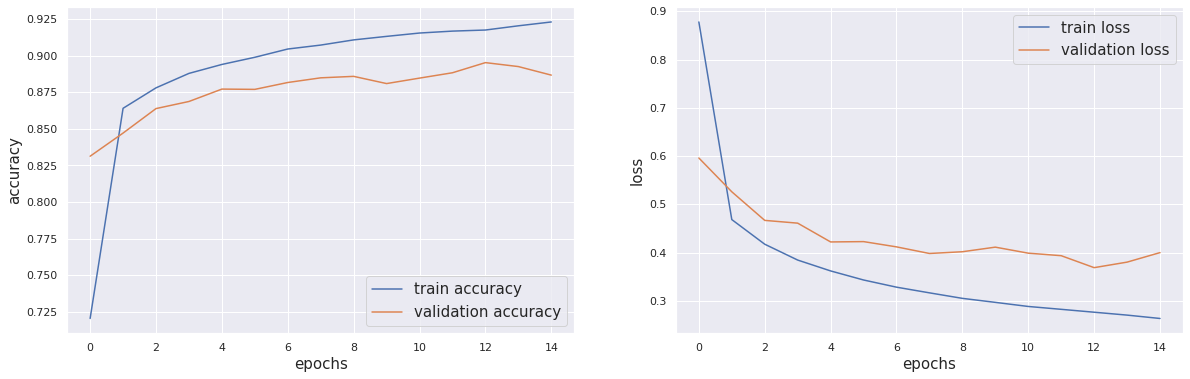

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='train accuracy')
plt.plot(history2.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.legend(fontsize=15)
plt.show()

From the 10. epoch there's an increase in validation error while training error decreases, and starting with the 13. epoch there's a decrease in validation accuracy while the training accuracy keeps increascing. We could say this is caused by overfitting, but I think we need a few more epochs to be able to say confidently.

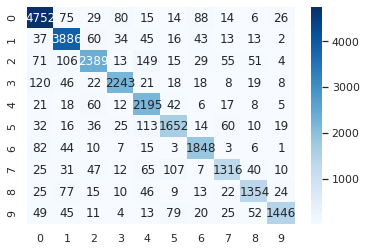

In [34]:
cm2 = confusion_matrix(test_y, np.argmax(preds2, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')

# Task 5

In [35]:
model3 = keras.models.Sequential()
model3.add(Conv2D(16, (3, 3), input_shape=train_X.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(16, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(keras.layers.Dense(10, activation='softmax'))

In [36]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_10 (Activation)   (None, 12, 12, 32)       

In [38]:
history3 = model3.fit(x=train_X, y=train_y_oh, batch_size=32, epochs=15, validation_data=(test_X, test_y_oh))

Epoch 1/15
2290/2290 [==============================] - 11s 5ms/step - loss: 0.9456 - accuracy: 0.6902 - val_loss: 0.4947 - val_accuracy: 0.8526
Epoch 2/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4591 - accuracy: 0.8605 - val_loss: 0.4290 - val_accuracy: 0.8720
Epoch 3/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3971 - accuracy: 0.8800 - val_loss: 0.3589 - val_accuracy: 0.8952
Epoch 4/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3662 - accuracy: 0.8898 - val_loss: 0.3624 - val_accuracy: 0.8939
Epoch 5/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3495 - accuracy: 0.8947 - val_loss: 0.3516 - val_accuracy: 0.8970
Epoch 6/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3354 - accuracy: 0.8998 - val_loss: 0.3199 - val_accuracy: 0.9078
Epoch 7/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3227 - accuracy: 0.9029 - val_loss: 0.3356 - val_ac

In [39]:
preds3 = model3.predict(test_X)

In [40]:
print('accuracy:', accuracy_score(test_y, np.argmax(preds3, axis=1)))

accuracy: 0.9253995082974801


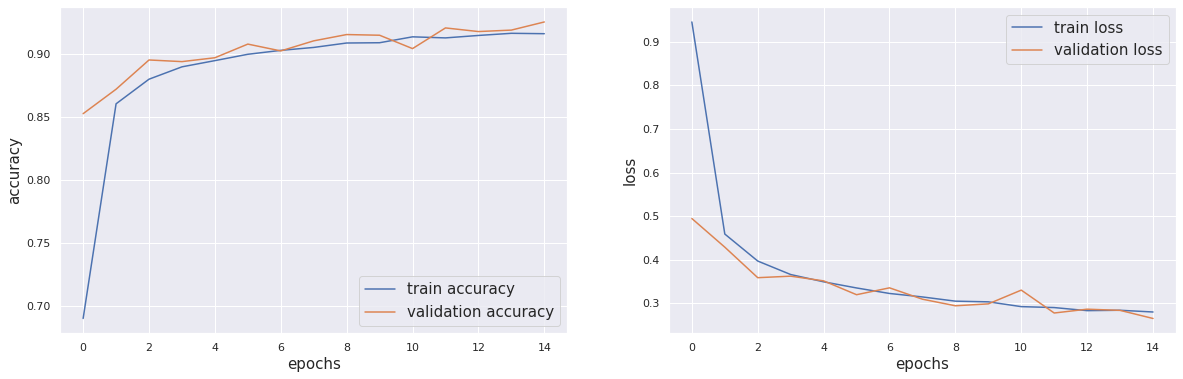

In [41]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='train accuracy')
plt.plot(history3.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='validation loss')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.legend(fontsize=15)
plt.show()